In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [3]:
df = pd.read_csv('/content/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
df["DateTime"] = pd.to_datetime(df['DateTime'], utc = True)
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['day_of_month'] = df['DateTime'].dt.day
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['Date']= df['DateTime'].dt.date
df['Time']= df['DateTime'].dt.hour
df['day_of_year']=  df['DateTime'].dt.dayofyear
df['Seconds'] = pd.to_timedelta(df['DateTime'].dt.strftime('%H:%M:%S')).dt.total_seconds().astype(int)

In [5]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,day_of_month,day_of_week,Date,Time,day_of_year,Seconds
0,2015-11-01 00:00:00+00:00,1,15,20151101001,2015,11,1,6,2015-11-01,0,305,0
1,2015-11-01 01:00:00+00:00,1,13,20151101011,2015,11,1,6,2015-11-01,1,305,3600
2,2015-11-01 02:00:00+00:00,1,10,20151101021,2015,11,1,6,2015-11-01,2,305,7200
3,2015-11-01 03:00:00+00:00,1,7,20151101031,2015,11,1,6,2015-11-01,3,305,10800
4,2015-11-01 04:00:00+00:00,1,9,20151101041,2015,11,1,6,2015-11-01,4,305,14400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   DateTime      48120 non-null  datetime64[ns, UTC]
 1   Junction      48120 non-null  int64              
 2   Vehicles      48120 non-null  int64              
 3   ID            48120 non-null  int64              
 4   Year          48120 non-null  int64              
 5   Month         48120 non-null  int64              
 6   day_of_month  48120 non-null  int64              
 7   day_of_week   48120 non-null  int64              
 8   Date          48120 non-null  object             
 9   Time          48120 non-null  int64              
 10  day_of_year   48120 non-null  int64              
 11  Seconds       48120 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(10), object(1)
memory usage: 4.4+ MB


In [7]:
df.isnull().sum()

DateTime        0
Junction        0
Vehicles        0
ID              0
Year            0
Month           0
day_of_month    0
day_of_week     0
Date            0
Time            0
day_of_year     0
Seconds         0
dtype: int64

In [8]:
df.describe()

,Junction,Vehicles,ID,Year,Month,day_of_month,day_of_week,Time,day_of_year,Seconds
count,48120.000000,48120.000000,4.812000e+04,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2.180549,22.791334,2.016330e+10,2016.269825,5.884289,15.700748,2.996010,11.500000,163.926185,41400.000000
std,0.966955,20.750063,5.944854e+06,0.616093,3.569872,8.784073,2.000017,6.922258,109.219475,24920.130527
min,1.000000,1.000000,2.015110e+10,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,9.000000,2.016042e+10,2016.000000,3.000000,8.000000,1.000000,5.750000,72.000000,20700.000000
50%,2.000000,15.000000,2.016093e+10,2016.000000,5.000000,16.000000,3.000000,11.500000,144.000000,41400.000000
75%,3.000000,29.000000,2.017023e+10,2017.000000,9.000000,23.000000,5.000000,17.250000,260.000000,62100.000000
max,4.000000,180.000000,2.017063e+10,2017.000000,12.000000,31.000000,6.000000,23.000000,366.000000,82800.000000


In [9]:

df.nunique()

DateTime        14592
Junction            4
Vehicles          141
ID              48120
Year                3
Month              12
day_of_month       31
day_of_week         7
Date              608
Time               24
day_of_year       366
Seconds            24
dtype: int64

In [18]:
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_corr=df_corr.loc[(df_corr['level_0']=='Vehicles') & (df_corr['level_0']!=df_corr['level_1'])]
df_corr.columns = ['Target Feature', 'Input Features', 'Correlation ']
df_corr.reset_index(inplace=True)
df_corr.drop('index', axis=1)

<ipython-input-18-b247c4a1c59d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()


,Target Feature,Input Features,Correlation
0,Vehicles,day_of_year,0.020746
1,Vehicles,Month,0.022723
2,Vehicles,day_of_month,0.027895
3,Vehicles,day_of_week,0.126027
4,Vehicles,Seconds,0.219938
5,Vehicles,Time,0.219938
6,Vehicles,Year,0.221253
7,Vehicles,ID,0.227974
8,Vehicles,Junction,0.613787


<ipython-input-13-73b38cd38c95>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


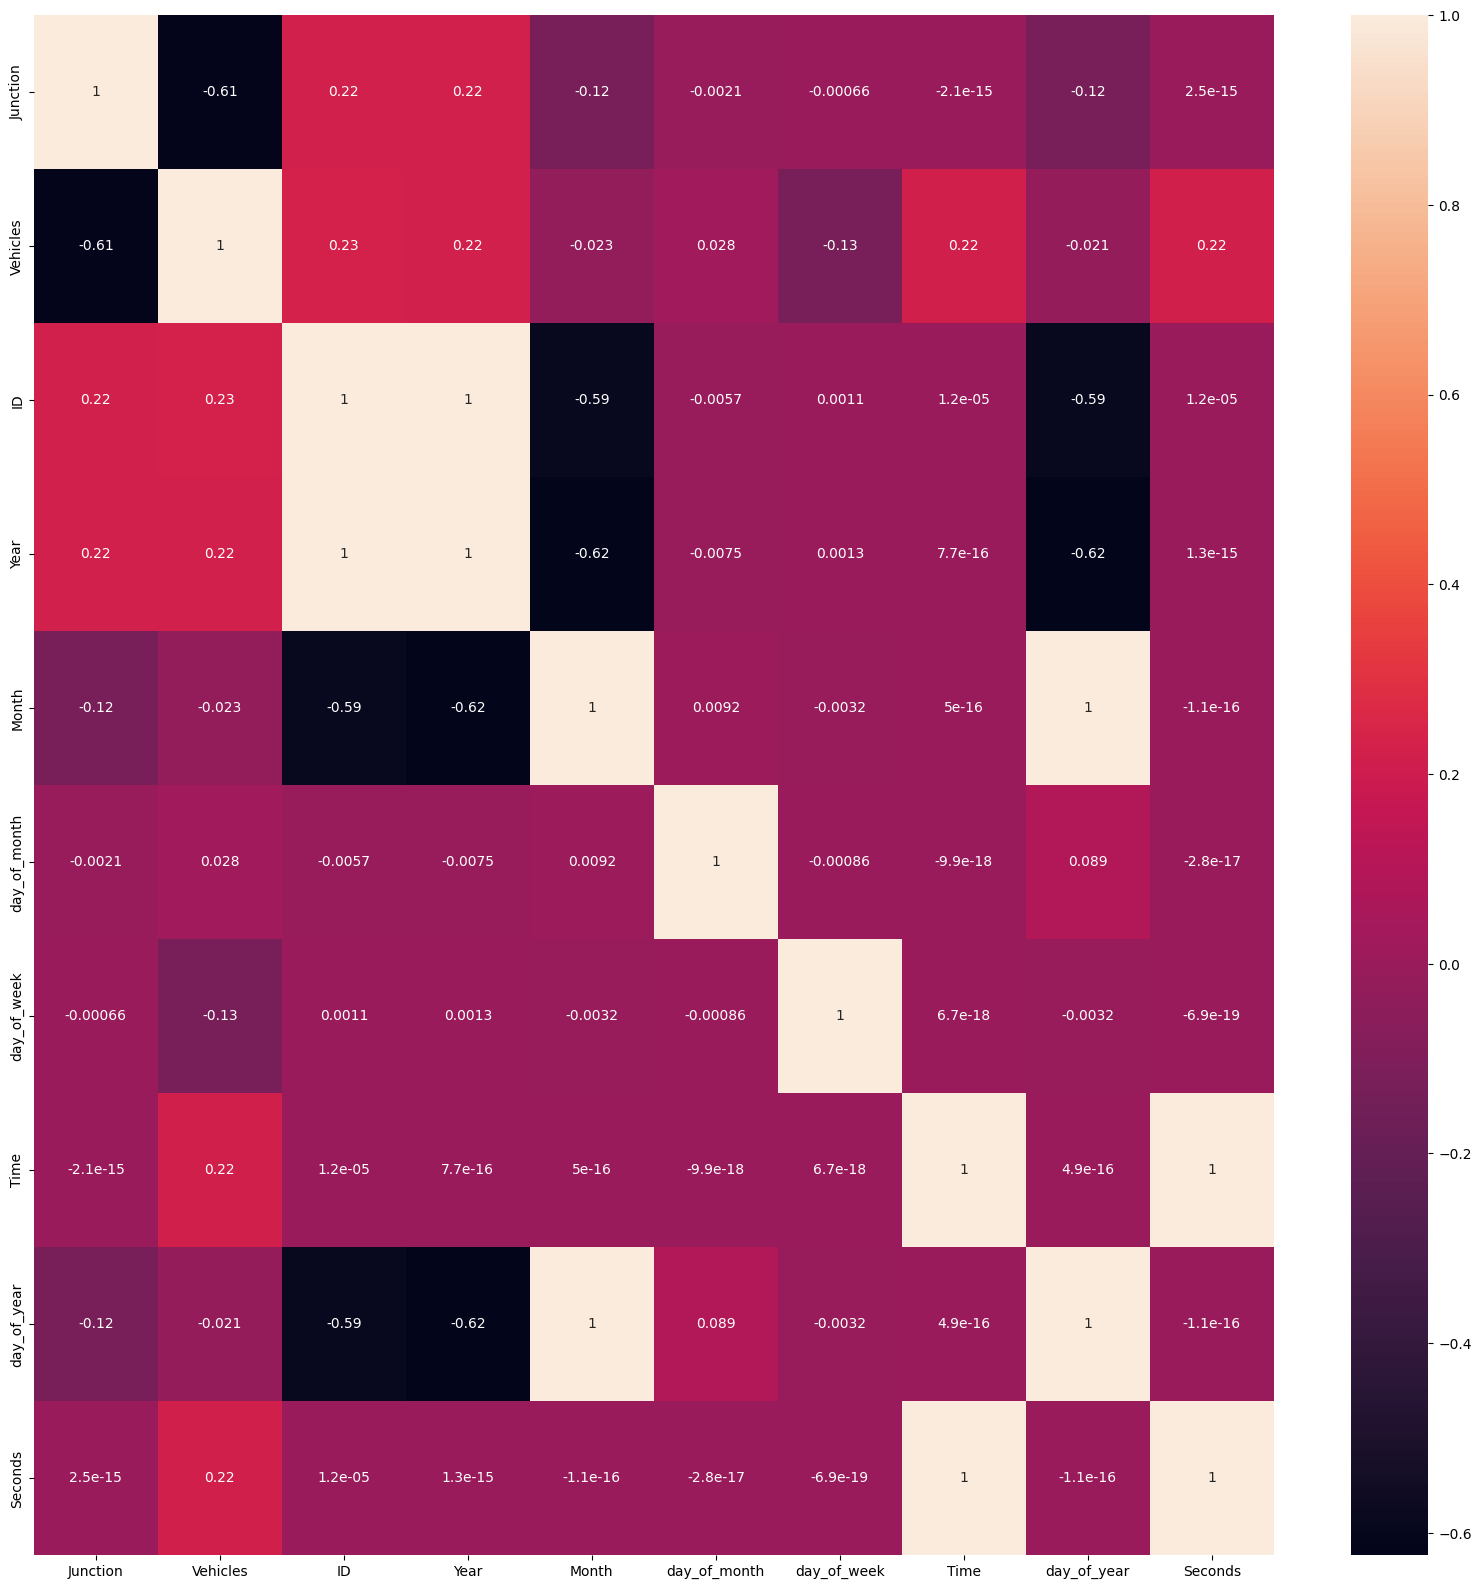

In [13]:

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
df_junction = df.groupby(["Junction"])["Vehicles"].sum().reset_index(name = "Total_Vehicles")
df_junction

,Junction,Total_Vehicles
0,1,657412
1,2,207983
2,3,199823
3,4,31501


<Axes: title={'center': 'Vehicular Movement of Junctions'}, xlabel='Junction', ylabel='Total Vehicles'>

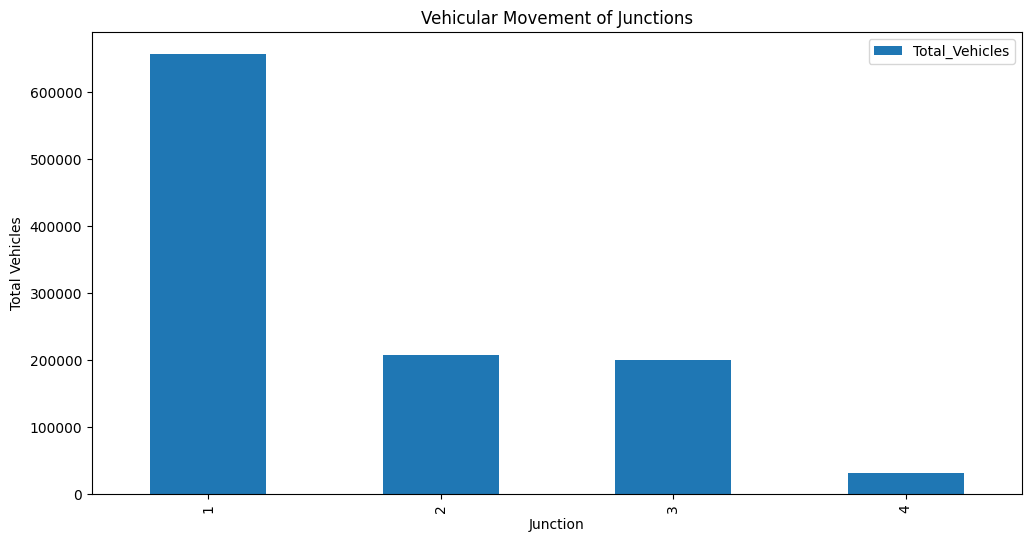

In [19]:
## Plotted Bar Chart to visualize vehicular movement of Junctions
df_junction.plot (x="Junction", y= "Total_Vehicles",
        kind="bar",
        figsize=(12,6),
        title="Vehicular Movement of Junctions",
        xlabel = "Junction",
        ylabel = "Total Vehicles"
)